# Electricity Price Forecasting on the German day-ahead market

This notebook is the main interface to the associated EPF library. Various parameters can be adjusted within the library via the Config file. A more detailed description of the individual parameters can be found within the configuration classes. In the “exploratory_analysis” notebook, the raw data sets are analyzed exploratively and the results are displayed visually. Based on these results, features from the data sets were specifically selected for further use in the deep learning pipeline.

The forecasting pipeline is built to automatically perform data preprocessing including data cleaning, outlier removal and seasonal decomposition. Within the configuration feature engineering can be toggled on and of for each feature. Forecasting is done with three different models, that can be retrained and saved anytime. The models available are an LSTM, GRU and CNN. They all perform multi-step ahead, single shot forecasts. This means by default each forecast contains 24 time steps into the future, that are forecasted together in one computation.

In [1]:
from datetime import datetime

from epf.pipeline import EpfPipeline

pipeline = EpfPipeline()

2025-05-09 22:04:41.077 | INFO     | epf.config:<module>:18 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-09 22:04:41.077 | INFO     | epf.config:create_dir:14 - PREDICTIONS_D

Pipeline initialized with:
FeatureConfig: 
WINDOW_LENGTH: 24
N_SIGMA: 3
METHOD: nearest

ModelConfig: 
TRAIN_SPLIT: 0.7
VALIDATION_SPLIT: 0.9
MAX_EPOCHS: 20
OUT_STEPS: 24
MODEL_BUILDER: LSTM
NUM_FEATURES: 22
UNIT_MIN_VALUE: 32
UNIT_MAX_VALUE: 512
UNIT_MAX_VALUE_CONV: 2048
UNIT_STEP: 32
KERNEL_SIZE_MIN_VALUE: 1
KERNEL_SIZE_MAX_VALUE: 10
KERNEL_SIZE_STEP: 1
LEARNING_RATE: [0.01, 0.001, 0.0001]
DROPOUT_RATE_MIN_VALUE: 0
DROPOUT_RATE_MAX_VALUE: 0.99
DROPOUT_RATE_STEP: 0.05
USE_DROPOUT: True
NUM_LAYERS_MIN: 0
NUM_LAYERS_MAX: 0
NUM_LAYERS_STEP: 1
MAX_TRIALS: 50
LABEL_COL: de_prices_hat_rm_seasonal




In [2]:
pipeline.train('lstm_all_features_hl0_drY', overwrite=True, prep_data=True, use_tuned_hyperparams=False)

Trial 50 Complete [00h 00m 55s]
mean_absolute_error: 0.20326276123523712

Best mean_absolute_error So Far: 0.17150676250457764
Total elapsed time: 00h 35m 13s


C:\Users\valen\.virtualenvs\bachelor_arbeit\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-05-09 22:42:56.945 | INFO     | epf.pipeline:_tune_hyperparameters:326 - Hyperparameter tuning took 00h:35m:14s.
2025-05-09 22:42:56.945 | SUCCESS  | epf.pipeline:train:434 - Successfully tuned hyperparameters for lstm_all_features_hl0_drY
2025-05-09 22:42:56.945 | INFO     | epf.pipeline:train:441 - Training lstm_all_features_hl0_drY on the following Features:['DE-LU Prices', 'CH Prices', 'DK1 Prices', 'DK2 Prices', 'FR Prices', 'DE-LU Prices 7-Day Lag', 'DE-LU Prices 24-Hour Lag', 'DE-LU Prices 12-Hour Lag', 'DE-LU Prices 1-Hour Lag', 'DE Solar Generation', 'DE Wind Generation Offshore', 'DE Wind Generation Onshore', 'DE Gas Generation', 'DE Lignite Generation', 'DE Hard Coal Generation', '

Epoch 1/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - loss: 0.0560 - mean_absolute_error: 0.1772 - val_loss: 0.5433 - val_mean_absolute_error: 0.5354
Epoch 2/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.1591 - val_loss: 0.6499 - val_mean_absolute_error: 0.6005
Epoch 3/20
383/383 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0350 - mean_absolute_error: 0.1393 - val_loss: 0.5846 - val_mean_absolute_error: 0.5613


2025-05-09 22:43:37.431 | SUCCESS  | epf.pipeline:train:447 - Successfully trained lstm_all_features_hl0_drY. Now saving...
2025-05-09 22:43:37.506 | SUCCESS  | epf.pipeline:train:470 - Successfully saved lstm_all_features_hl0_drY to C:/Users/valen/PycharmProjects/epf/models/lstm_all_features_hl0_drY.pkl
2025-05-09 22:43:37.506 | INFO     | epf.pipeline:train:475 - Training took 00h:38m:55s.


In [3]:
pipeline.evaluate('lstm_all_features_hl0_drY')

2025-05-09 22:45:07.260 | INFO     | epf.pipeline:evaluate:487 - Loading trained model from C:\Users\valen\PycharmProjects\epf\models\lstm_all_features_hl0_drY.pkl.


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6054 - mean_absolute_error: 0.5678


2025-05-09 22:45:09.483 | INFO     | epf.pipeline:evaluate:520 - Evaluation took 00h:00m:02s.


In [4]:
import pickle as pkl

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

with open("../data/processed/val_performance.pkl", "rb") as f:
    val_performance = pkl.load(f)

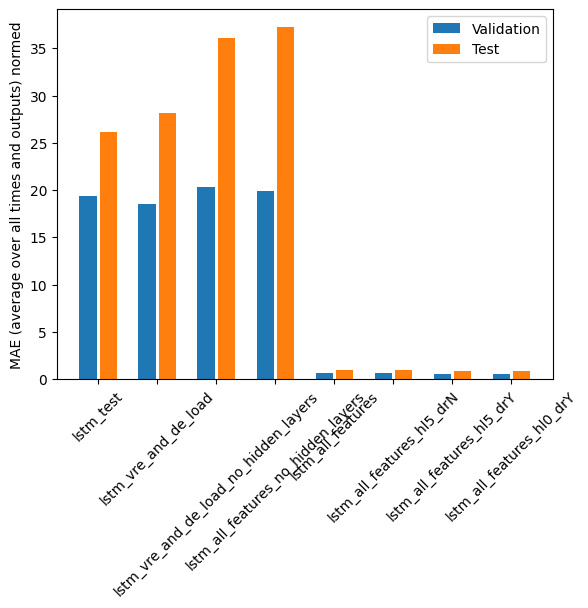

In [5]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs) normed')
_ = plt.legend()

In [ ]:
import pickle as pkl

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

window = model_obj['window']
model = model_obj['best_model']
window.plot(model)

In [ ]:
from epf.config import PREDICTIONS_DIR, MODELS_DIR

model_path = MODELS_DIR / "lstm_all_features.keras"
predictions_dir = PREDICTIONS_DIR

In [ ]:
pipeline.predict(data=window.test, model_path=model_path, predictions_dir=predictions_dir)